# Val's Workout Data Analysis

## Import Dataset

In [1]:
import pandas as pd

# Title: Reading Workout Data from CSV


# Read the workout data from CSV file
df = pd.read_csv('./workout_data.csv')

# Display the first few rows to verify
df

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_kg,reps,distance_km,duration_seconds,rpe
0,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",NaN,Behind Body Cable Curl,NaN,NaN,0,normal,17.0,9.0,NaN,NaN,NaN
1,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",NaN,Behind Body Cable Curl,NaN,NaN,1,normal,19.5,9.0,NaN,NaN,NaN
2,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",NaN,Behind Body Cable Curl,NaN,NaN,2,normal,19.5,10.0,NaN,NaN,NaN
3,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",NaN,Lat Pulldown (Cable),NaN,NaN,0,normal,63.0,5.0,NaN,NaN,NaN
4,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",NaN,Lat Pulldown (Cable),NaN,NaN,1,normal,58.5,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Pull day (arms focus),"15 Jun 2024, 20:19","15 Jun 2024, 21:26",NaN,Seated Cable Row - V Grip (Cable),NaN,NaN,1,normal,39.5,7.0,NaN,NaN,NaN
1130,Pull day (arms focus),"15 Jun 2024, 20:19","15 Jun 2024, 21:26",NaN,Seated Cable Row - V Grip (Cable),NaN,NaN,2,normal,39.5,7.0,NaN,NaN,NaN
1131,Pull day (arms focus),"15 Jun 2024, 20:19","15 Jun 2024, 21:26",NaN,Preacher Curl (Machine),NaN,NaN,0,normal,15.0,6.0,NaN,NaN,NaN
1132,Pull day (arms focus),"15 Jun 2024, 20:19","15 Jun 2024, 21:26",NaN,Preacher Curl (Machine),NaN,NaN,1,normal,15.0,6.0,NaN,NaN,NaN


## Data Cleaning

In [2]:
df = df.drop(columns=['description', 'superset_id', 'exercise_notes', 'set_type', 'distance_km', 'duration_seconds', 'rpe']) 
df.head()

,title,start_time,end_time,exercise_title,set_index,weight_kg,reps
0,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",Behind Body Cable Curl,0,17.0,9.0
1,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",Behind Body Cable Curl,1,19.5,9.0
2,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",Behind Body Cable Curl,2,19.5,10.0
3,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",Lat Pulldown (Cable),0,63.0,5.0
4,Pull day (arms focus),"16 May 2025, 20:47","16 May 2025, 21:44",Lat Pulldown (Cable),1,58.5,7.0


In [3]:
import pandas as pd
from IPython.display import display, Markdown

# Get unique exercise titles from the DataFrame
unique_titles = df['exercise_title'].unique()
n_unique = len(unique_titles)

# Create a DataFrame for the unique exercise titles (show up to 20)
table_df = pd.DataFrame({'Exercises': unique_titles[:20]})  

# Display as a markdown-style table
md_table = table_df.to_markdown(index=False)
display(Markdown("### Unique Exercise Titles (first 20)\n" + md_table))

if n_unique > 20:
    print("...")

print(f"\nNumber of unique exercise titles: {n_unique}")

### Unique Exercise Titles (first 20)
| Exercises                         |
|:----------------------------------|
| Behind Body Cable Curl            |
| Lat Pulldown (Cable)              |
| Seated Row (Machine)              |
| Preacher Curl (Machine)           |
| Incline Bench Press (Dumbbell)    |
| crossbody cable extension         |
| Butterfly (Pec Deck)              |
| Chest Press (Machine)             |
| Crunch (Machine)                  |
| Bicep Curl (Cable)                |
| Running                           |
| Lateral Raise (Machine)           |
| Seated Cable Row - V Grip (Cable) |
| Overhead Press (Barbell)          |
| Lateral Raise (Dumbbell)          |
| Rear Delt Reverse Fly (Cable)     |
| Single Arm Lat Pulldown           |
| Seated Shoulder Press (Machine)   |
| Lat Pulldown (Machine)            |
| Shrug (Barbell)                   |

...

Number of unique exercise titles: 28


### Transformation

In [4]:
# Sort by start time (assuming string format for now)
df['start_time'] = pd.to_datetime(df['start_time'], format='%d %b %Y, %H:%M')
df['end_time'] = pd.to_datetime(df['end_time'], format='%d %b %Y, %H:%M')

df_sorted = df.sort_values(by='start_time')

print("\n--- Time Range (based on start_time) ---")
first_date_full = df_sorted['start_time'].iloc[0].strftime('%d %b %Y')
last_date_full = df_sorted['end_time'].iloc[-1].strftime('%d %b %Y')
print(f"First Workout Session: {first_date_full}")
print(f"Last Workout Session: {last_date_full}")



--- Time Range (based on start_time) ---
First Workout Session: 15 Jun 2024
Last Workout Session: 16 May 2025


In [6]:
df['workout_duration'] = df['end_time'] - df['start_time']
df['workout_duration_minutes'] = df['workout_duration'].dt.total_seconds() / 60

df.head()  


,title,start_time,end_time,exercise_title,set_index,weight_kg,reps,workout_duration,workout_duration_minutes
0,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Behind Body Cable Curl,0,17.0,9.0,0 days 00:57:00,57.0
1,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Behind Body Cable Curl,1,19.5,9.0,0 days 00:57:00,57.0
2,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Behind Body Cable Curl,2,19.5,10.0,0 days 00:57:00,57.0
3,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Lat Pulldown (Cable),0,63.0,5.0,0 days 00:57:00,57.0
4,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Lat Pulldown (Cable),1,58.5,7.0,0 days 00:57:00,57.0


In [ ]:
df = df[df['workout_duration_minutes'] != 0]

In [9]:
df['set_volume'] = df['weight_kg'] * df['reps']

In [ ]:
df['workout_id'] = df['title'] + '_' + df['start_time'].astype(str)
workout_volume = df.groupby('workout_id')['set_volume'].sum().reset_index()
workout_volume = workout_volume.rename(columns={'set_volume': 'total_workout_volume'})
workout_volume = workout_volume[workout_volume['total_workout_volume'] > 0]
df.head() 
workout_volume.sort_values(by='total_workout_volume', ascending=True)  

,workout_id,total_workout_volume
2,Evening workout 🏋️_2025-04-07 21:28:00,0.00
92,Push day (chest focus)_2025-02-17 19:54:00,792.79
28,Pull day (arms focus)_2025-01-15 21:25:00,798.00
100,Push day (chest focus)_2025-04-30 21:10:00,835.64
66,Push day (chest focus)_2024-08-08 19:03:00,864.00
...,...,...
83,Push day (chest focus)_2024-12-16 15:25:00,3459.50
10,Pull day (arms focus)_2024-08-20 20:17:00,3675.50
44,Pull day (back focus)_2024-08-01 17:36:00,3950.50
51,Pull day (back focus)_2024-10-26 20:02:00,4040.00


In [11]:
# Apply the Epley formula (only for sets with reps > 0)
df['estimated_1rm'] = df.apply(
    lambda row: row['weight_kg'] * (1 + row['reps'] / 30) if row['reps'] > 0 else None,
    axis=1
)
df.head()

,title,start_time,end_time,exercise_title,set_index,weight_kg,reps,workout_duration,workout_duration_minutes,set_volume,workout_id,estimated_1rm
0,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Behind Body Cable Curl,0,17.0,9.0,0 days 00:57:00,57.0,153.0,Pull day (arms focus)_2025-05-16 20:47:00,22.10
1,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Behind Body Cable Curl,1,19.5,9.0,0 days 00:57:00,57.0,175.5,Pull day (arms focus)_2025-05-16 20:47:00,25.35
2,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Behind Body Cable Curl,2,19.5,10.0,0 days 00:57:00,57.0,195.0,Pull day (arms focus)_2025-05-16 20:47:00,26.00
3,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Lat Pulldown (Cable),0,63.0,5.0,0 days 00:57:00,57.0,315.0,Pull day (arms focus)_2025-05-16 20:47:00,73.50
4,Pull day (arms focus),2025-05-16 20:47:00,2025-05-16 21:44:00,Lat Pulldown (Cable),1,58.5,7.0,0 days 00:57:00,57.0,409.5,Pull day (arms focus)_2025-05-16 20:47:00,72.15


In [12]:
df['day_of_week'] = df['start_time'].dt.day_name()
df['hour_of_day'] = df['start_time'].dt.hour

## Workout Analysis

### Training Volume Trend

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['workout_id'] = df['title'] + '_' + df['start_time'].astype(str)

# Calculate total workout volume again, but keep the start_time associated
workout_volume = df.groupby('workout_id').agg(
    total_workout_volume=('set_volume', 'sum'),
    start_time=('start_time', 'first')
).reset_index()

workout_volume['start_time'] = pd.to_datetime(workout_volume['start_time'])

print("--- Workout Volume DataFrame (first 5 rows) ---")
print(workout_volume.head())

# Set a style for the plots
sns.set_style("whitegrid")

--- Workout Volume DataFrame (first 5 rows) ---
                                  workout_id  total_workout_volume  \
0    Afternoon workout 💪_2024-07-22 17:53:00                1114.0   
1     Evening workout 🏋️_2024-12-19 21:51:00                1135.0   
2     Evening workout 🏋️_2025-04-07 21:28:00                   0.0   
3  Pull day (arms focus)_2024-06-15 20:19:00                2287.5   
4  Pull day (arms focus)_2024-06-29 18:46:00                2816.0   

           start_time  
0 2024-07-22 17:53:00  
1 2024-12-19 21:51:00  
2 2025-04-07 21:28:00  
3 2024-06-15 20:19:00  
4 2024-06-29 18:46:00  


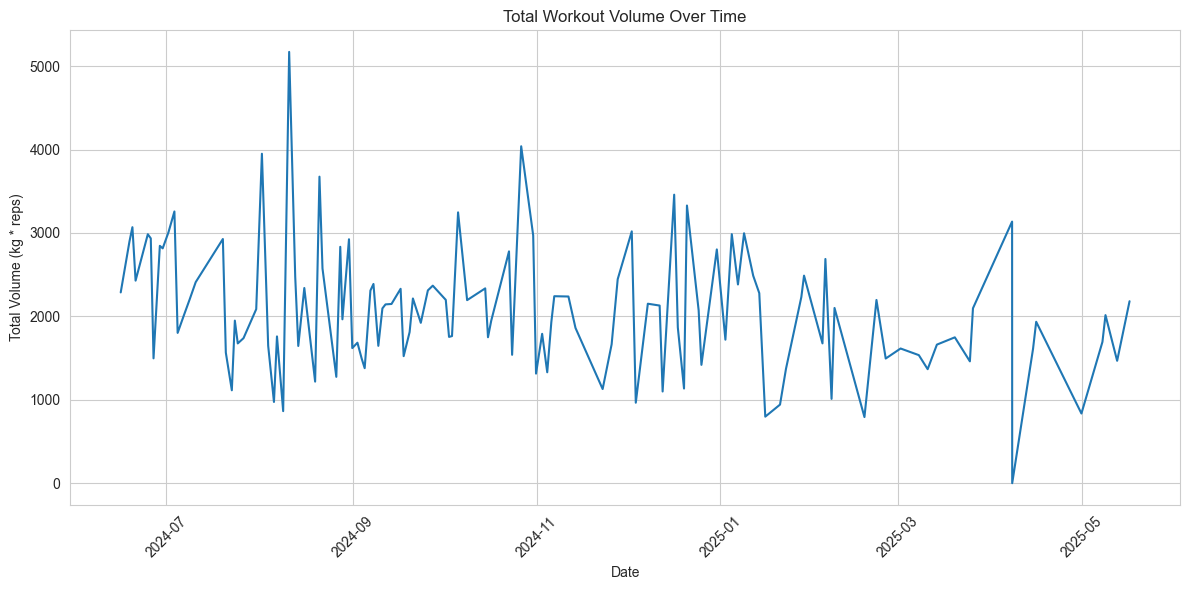

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=workout_volume, x='start_time', y='total_workout_volume')
plt.title('Total Workout Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume (kg * reps)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Strength Progression for Select Exercises

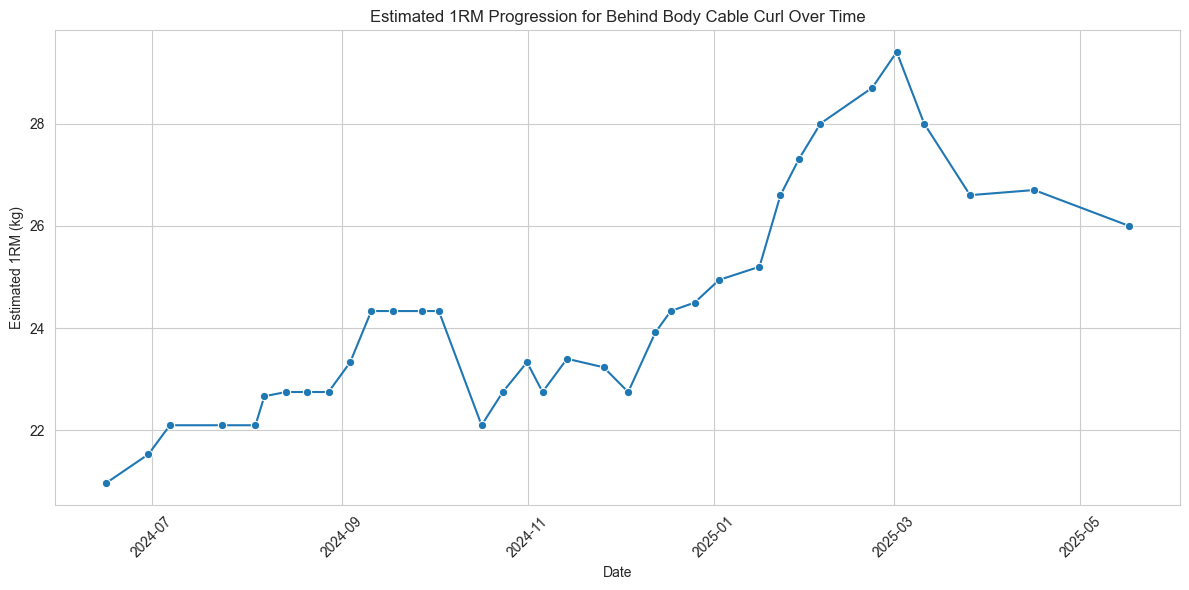

In [15]:
# Plotting Estimated 1RM for a Specific Exercise
exercise_to_analyze = 'Behind Body Cable Curl' # Replace with one of any specific exercise

# Filter data for the specific exercise
exercise_data = df[df['exercise_title'] == exercise_to_analyze].copy()

# To avoid plotting every single set's 1RM estimate (which can be noisy),
# let's look at the maximum estimated 1RM achieved per workout for this exercise.
# This gives a better sense of strength progression across sessions.
max_1rm_per_workout = exercise_data.groupby('workout_id').agg(
    max_estimated_1rm=('estimated_1rm', 'max'),
    start_time=('start_time', 'first')
).reset_index()

# Ensure the start_time column is datetime objects
max_1rm_per_workout['start_time'] = pd.to_datetime(max_1rm_per_workout['start_time'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=max_1rm_per_workout, x='start_time', y='max_estimated_1rm', marker='o')
plt.title(f'Estimated 1RM Progression for {exercise_to_analyze} Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated 1RM (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Best Performing Days and Hours

In [16]:
workout_volume['day_of_week'] = workout_volume['start_time'].dt.day_name()
workout_volume['hour_of_day'] = workout_volume['start_time'].dt.hour

# Define the order of days of the week for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
workout_volume['day_of_week'] = pd.Categorical(workout_volume['day_of_week'], categories=day_order, ordered=True)

sns.set_style("whitegrid")


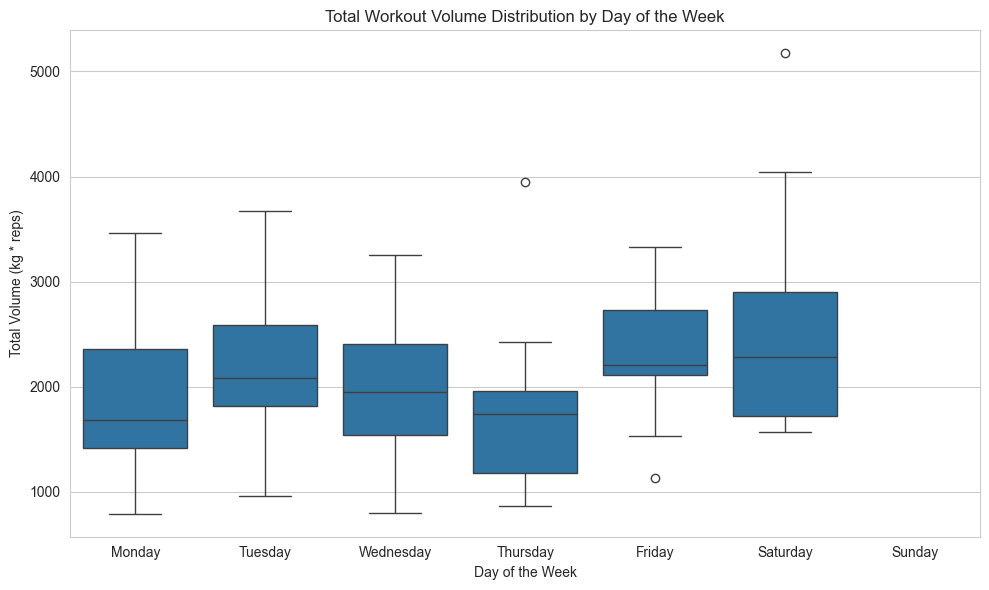

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=workout_volume, x='day_of_week', y='total_workout_volume')
plt.title('Total Workout Volume Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Volume (kg * reps)')
plt.tight_layout()
plt.show()

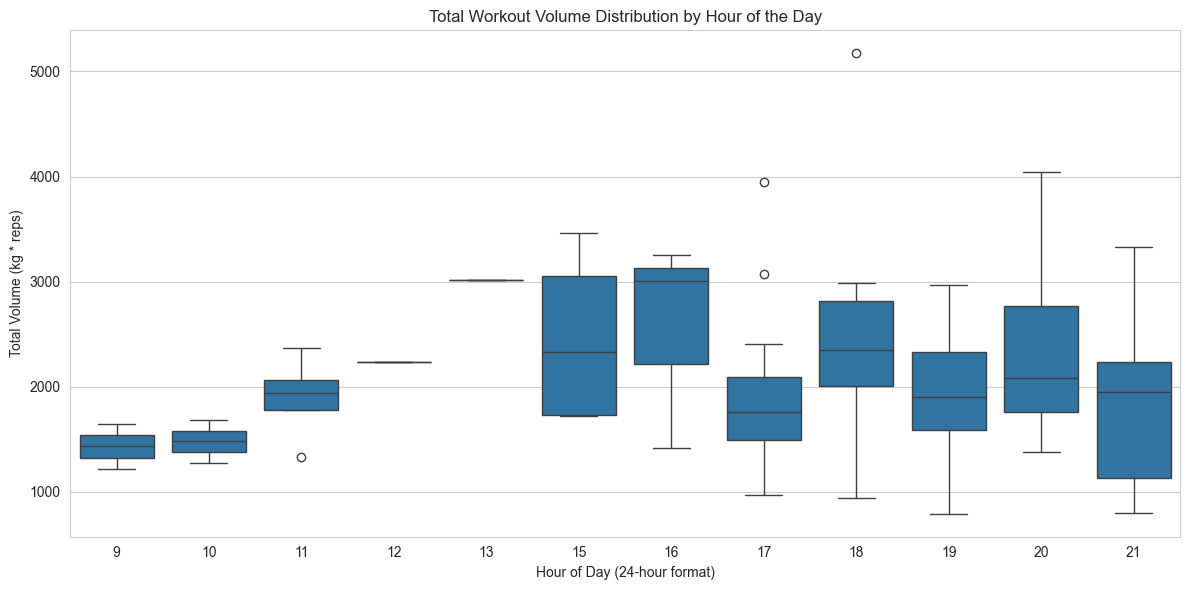

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=workout_volume, x='hour_of_day', y='total_workout_volume')
plt.title('Total Workout Volume Distribution by Hour of the Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Total Volume (kg * reps)')
plt.tight_layout()
plt.show()